<h3>Simulasi Monte Carlo</h3>

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fungsi untuk simulasi Monte Carlo dengan batasan nilai positif
def monte_carlo_simulation(num_simulations, mean, std_dev):
    results = []
    for _ in range(num_simulations):
        # Menggunakan data dari gambar
        fixed_cost = 50000  # Biaya tetap
        variable_unit_cost = 125  # Biaya variabel per unit
        supplier_unit_cost = 175  # Biaya unit pembelian dari pemasok

        # Menghitung volume produksi
        production_volume = np.random.normal(mean, std_dev)
        production_volume = max(production_volume, 0)  # Permintaan tidak bisa negatif

        # Menghitung total biaya manufaktur dan pembelian
        total_manufacturing_cost = fixed_cost + (variable_unit_cost * production_volume)
        total_purchased_cost = supplier_unit_cost * production_volume

        # Menghitung selisih biaya
        cost_diff = total_purchased_cost - total_manufacturing_cost

        # Keputusan berdasarkan selisih biaya
        decision = "Outsourcing" if cost_diff > 0 else "Manufacture"

        # Menyimpan hasil
        results.append({
            'Fixed Cost': fixed_cost,
            'Variable Cost': variable_unit_cost,
            'Production Volume': production_volume,
            'Total Manufacturing Cost': total_manufacturing_cost,
            'Total Purchased Cost': total_purchased_cost,
            'Cost Difference': cost_diff,
            'Decision': decision
        })
    return pd.DataFrame(results)

# Parameter simulasi
mean = 1000  # Rata-rata permintaan
std_dev = 100  # Simpangan baku permintaan
num_simulations = 100000  # Jumlah simulasi yang diinginkan

# Menjalankan simulasi
simulation_results = monte_carlo_simulation(num_simulations, mean, std_dev)

# Menampilkan hasil
print(simulation_results.head())  # Tampilkan 5 hasil pertama


   Fixed Cost  Variable Cost  Production Volume  Total Manufacturing Cost  \
0       50000            125        1001.068111             175133.513862   
1       50000            125        1100.840500             187605.062493   
2       50000            125         855.928130             156991.016229   
3       50000            125        1137.208297             192151.037100   
4       50000            125        1041.146907             180143.363409   

   Total Purchased Cost  Cost Difference     Decision  
0         175186.919406        53.405545  Outsourcing  
1         192647.087490      5042.024997  Outsourcing  
2         149787.422720     -7203.593509  Manufacture  
3         199011.451940      6860.414840  Outsourcing  
4         182200.708773      2057.345364  Outsourcing  


In [3]:
print (simulation_results)

       Fixed Cost  Variable Cost  Production Volume  Total Manufacturing Cost  \
0           50000            125        1001.068111             175133.513862   
1           50000            125        1100.840500             187605.062493   
2           50000            125         855.928130             156991.016229   
3           50000            125        1137.208297             192151.037100   
4           50000            125        1041.146907             180143.363409   
...           ...            ...                ...                       ...   
99995       50000            125         962.243737             170280.467083   
99996       50000            125        1110.696003             188837.000436   
99997       50000            125        1051.773008             181471.625940   
99998       50000            125        1067.858234             183482.279265   
99999       50000            125         996.920451             174615.056327   

       Total Purchased Cost

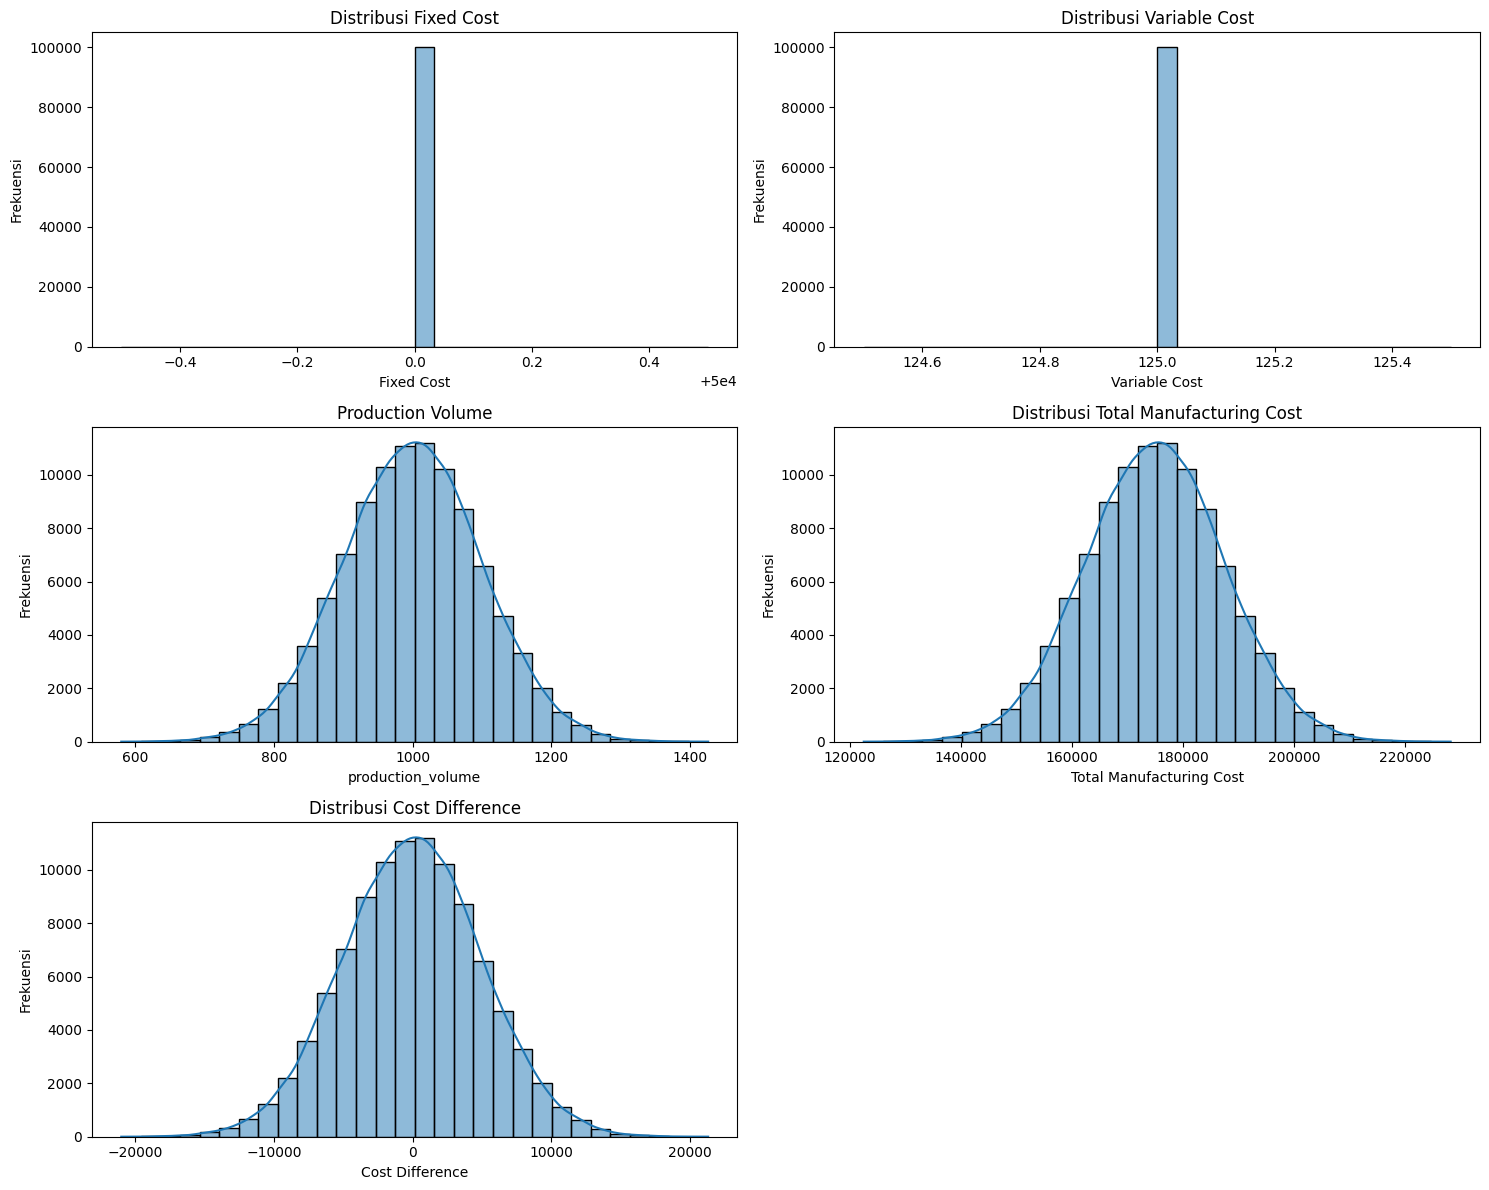

In [4]:
# Visualisasi distribusi
plt.figure(figsize=(15, 12))

# Histogram untuk Fixed Cost
plt.subplot(3, 2, 1)
sns.histplot(simulation_results['Fixed Cost'], bins=30, kde=True)
plt.title('Distribusi Fixed Cost')
plt.xlabel('Fixed Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Variable Cost
plt.subplot(3, 2, 2)
sns.histplot(simulation_results['Variable Cost'], bins=30, kde=True)
plt.title('Distribusi Variable Cost')
plt.xlabel('Variable Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Demand
plt.subplot(3, 2, 3)
sns.histplot(simulation_results['Production Volume'], bins=30, kde=True)
plt.title('Production Volume')
plt.xlabel('production_volume')
plt.ylabel('Frekuensi')

# Histogram untuk Total Cost
plt.subplot(3, 2, 4)
sns.histplot(simulation_results['Total Manufacturing Cost'], bins=30, kde=True)
plt.title('Distribusi Total Manufacturing Cost')
plt.xlabel('Total Manufacturing Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Cost Difference
plt.subplot(3, 2, 5)
sns.histplot(simulation_results['Cost Difference'], bins=30, kde=True)
plt.title('Distribusi Cost Difference')
plt.xlabel('Cost Difference')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [5]:
# Menghitung persentase outsourcing dan manufaktur
outsourcing_percentage = (simulation_results['Decision'] == 'Outsourcing').mean() * 100
manufacturing_percentage = (simulation_results['Decision'] == 'Manufacture').mean() * 100

print(f"Persentase Outsourcing: {outsourcing_percentage:.2f}%")
print(f"Persentase Manufaktur: {manufacturing_percentage:.2f}%")

Persentase Outsourcing: 50.08%
Persentase Manufaktur: 49.92%


<h3>Uji Konvergensi</h3>

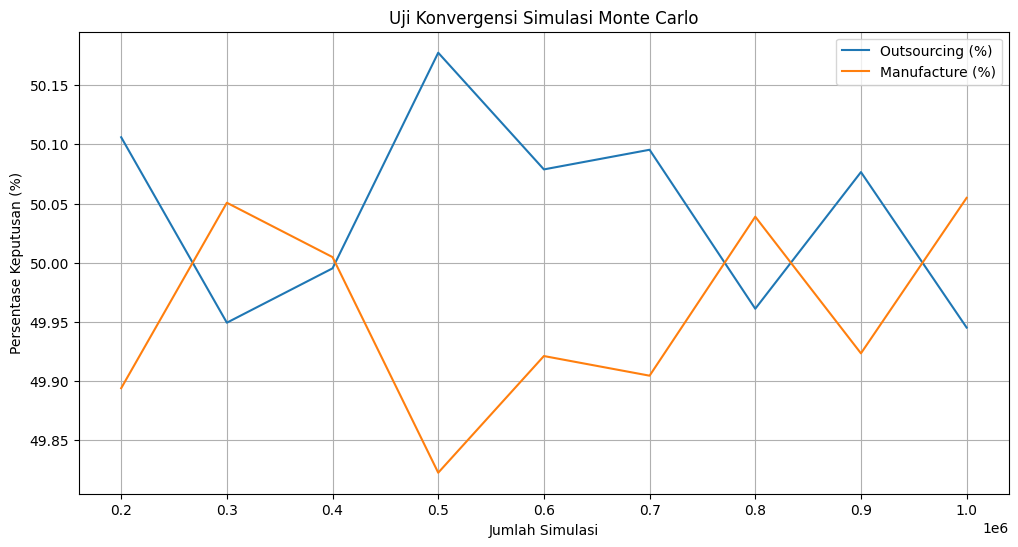

,Num Simulations,Outsourcing,Manufacture,Outsourcing (%),Manufacture (%)
0,200000,100212,99788,50.106000,49.894000
1,300000,149848,150152,49.949333,50.050667
2,400000,199981,200019,49.995250,50.004750
3,500000,250887,249113,50.177400,49.822600
4,600000,300473,299527,50.078833,49.921167
5,700000,350668,349332,50.095429,49.904571
6,800000,399689,400311,49.961125,50.038875
7,900000,450689,449311,50.076556,49.923444
8,1000000,499452,500548,49.945200,50.054800


In [ ]:
# Uji Konvergensi
decision_counts = []
for num_simulations in range(200000, 1000001, 100000):  # Melakukan simulasi dari 200.000 hingga 1.000.000 dengan interval 100.000
    simulation_results = monte_carlo_simulation(num_simulations, mean, std_dev)

    # Menghitung jumlah keputusan
    outsourcing_count = simulation_results['Decision'].value_counts().get('Outsourcing', 0)
    manufacturing_count = simulation_results['Decision'].value_counts().get('Manufacture', 0)

    # Menghitung persentase keputusan
    outsourcing_percent = (outsourcing_count / num_simulations) * 100
    manufacturing_percent = (manufacturing_count / num_simulations) * 100

    # Menyimpan hasil
    decision_counts.append({
        'Num Simulations': num_simulations,
        'Outsourcing': outsourcing_count,
        'Manufacture': manufacturing_count,
        'Outsourcing (%)': outsourcing_percent,
        'Manufacture (%)': manufacturing_percent
    })

# Membuat DataFrame dari hasil
decision_df = pd.DataFrame(decision_counts)

# Plot hasil konvergensi
plt.figure(figsize=(12, 6))
plt.plot(decision_df['Num Simulations'], decision_df['Outsourcing (%)'], label='Outsourcing (%)')
plt.plot(decision_df['Num Simulations'], decision_df['Manufacture (%)'], label='Manufacture (%)')
plt.xlabel('Jumlah Simulasi')
plt.ylabel('Persentase Keputusan (%)')
plt.title('Uji Konvergensi Simulasi Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan tabel hasil konvergensi
decision_df

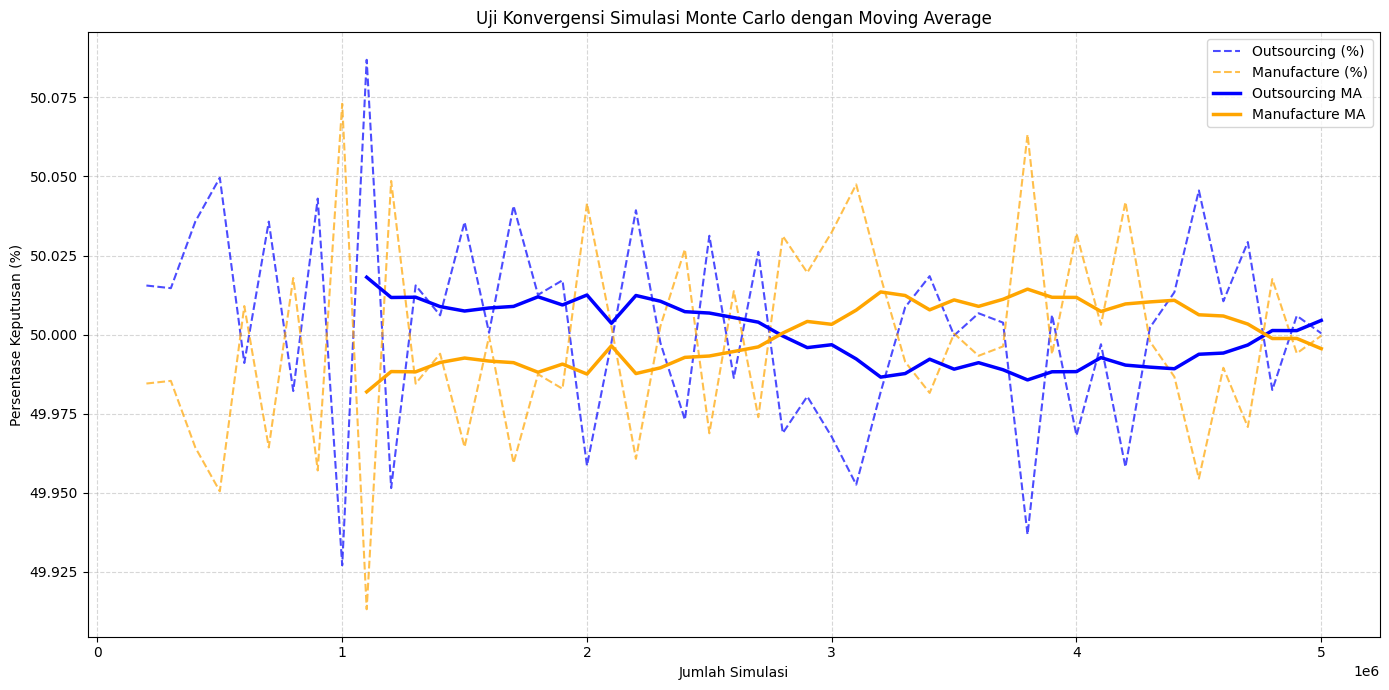

,Num Simulations,Outsourcing (%),Manufacture (%),Outsourcing MA,Manufacture MA
0,200000,50.015500,49.984500,NaN,NaN
1,300000,50.014667,49.985333,NaN,NaN
2,400000,50.035750,49.964250,NaN,NaN
3,500000,50.049600,49.950400,NaN,NaN
4,600000,49.991000,50.009000,NaN,NaN
5,700000,50.035714,49.964286,NaN,NaN
6,800000,49.982125,50.017875,NaN,NaN
7,900000,50.043000,49.957000,NaN,NaN
8,1000000,49.927000,50.073000,NaN,NaN
9,1100000,50.086909,49.913091,50.018127,49.981873


In [7]:
# Uji Konvergensi dengan Moving Average
decision_counts = []
window_size = 10  # Ukuran jendela untuk moving average

for num_simulations in range(200000, 5000001, 100000):
    simulation_results = monte_carlo_simulation(num_simulations, mean, std_dev)
    outsourcing_count = simulation_results['Decision'].value_counts().get('Outsourcing', 0)
    manufacturing_count = simulation_results['Decision'].value_counts().get('Manufacture', 0)
    outsourcing_percent = (outsourcing_count / num_simulations) * 100
    manufacturing_percent = (manufacturing_count / num_simulations) * 100
    decision_counts.append({
        'Num Simulations': num_simulations,
        'Outsourcing (%)': outsourcing_percent,
        'Manufacture (%)': manufacturing_percent
    })

decision_df = pd.DataFrame(decision_counts)

# Hitung moving average untuk Outsourcing dan Manufacture
decision_df['Outsourcing MA'] = decision_df['Outsourcing (%)'].rolling(window=window_size).mean()
decision_df['Manufacture MA'] = decision_df['Manufacture (%)'].rolling(window=window_size).mean()

# Plot hasil konvergensi dengan moving average
plt.figure(figsize=(14, 7))
plt.plot(decision_df['Num Simulations'], decision_df['Outsourcing (%)'], label='Outsourcing (%)', color='blue', linestyle='--', alpha=0.7)
plt.plot(decision_df['Num Simulations'], decision_df['Manufacture (%)'], label='Manufacture (%)', color='orange', linestyle='--', alpha=0.7)
plt.plot(decision_df['Num Simulations'], decision_df['Outsourcing MA'], label='Outsourcing MA', color='blue', linewidth=2.5)
plt.plot(decision_df['Num Simulations'], decision_df['Manufacture MA'], label='Manufacture MA', color='orange', linewidth=2.5)
plt.xlabel('Jumlah Simulasi')
plt.ylabel('Persentase Keputusan (%)')
plt.title('Uji Konvergensi Simulasi Monte Carlo dengan Moving Average')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Menampilkan tabel hasil konvergensi
decision_df